# Vector Calculus for AI/ML - Part 2: Differentiation Rules & Gradients

This notebook covers the essential differentiation rules and introduces gradients.

**Key Topics:** Sum Rule, Product Rule, Chain Rule, Partial Derivatives, Gradients

In [2]:
"""
Setup: Import Required Libraries
"""
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Ready for differentiation rules!")

Ready for differentiation rules!


## 5. Sum Rule

**The derivative of a sum is the sum of derivatives.**

**Formula:**
$$\frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)$$

**ML Importance:**
- Loss functions are almost always SUMS
- Example: Total loss = Σ individual losses
- Sum rule makes gradient computation modular and efficient

**Without sum rule → no scalable ML training**

In [ ]:
"""
Sum Rule for Derivatives

Key Property:
d/dx[f + g] = df/dx + dg/dx

Extends to any number of functions:
d/dx[f₁ + f₂ + ... + fₙ] = f₁' + f₂' + ... + fₙ'

ML Application:
Total Loss = Loss₁ + Loss₂ + ... + Lossₙ
∇(Total Loss) = ∇Loss₁ + ∇Loss₂ + ... + ∇Lossₙ
"""

print("="*60)
print("Sum Rule")
print("="*60)

# Example: f(x) = x² + 3x + 5
print("\nExample: f(x) = x² + 3x + 5")
print("-"*60)

# Break into parts
def f1(x):
    return x**2

def f2(x):
    return 3*x

def f3(x):
    return 5

def f_total(x):
    return f1(x) + f2(x) + f3(x)

# Derivatives of parts
def f1_prime(x):
    return 2*x

def f2_prime(x):
    return 3

def f3_prime(x):
    return 0

def f_total_prime(x):
    """Sum of derivatives"""
    return f1_prime(x) + f2_prime(x) + f3_prime(x)

# Verify using SymPy
x = sp.Symbol('x')
f_sym = x**2 + 3*x + 5 # type: ignore
f_deriv_sym = sp.diff(f_sym, x)

print(f"Function: f(x) = {f_sym}")
print(f"\nBreak into parts:")
print(f"  f₁(x) = x²     → f₁'(x) = 2x")
print(f"  f₂(x) = 3x     → f₂'(x) = 3")
print(f"  f₃(x) = 5      → f₃'(x) = 0")
print(f"\nSum of derivatives:")
print(f"  f'(x) = 2x + 3 + 0 = {f_deriv_sym}")

# Numerical verification
x_test = 4.0
deriv_analytical = f_total_prime(x_test)
deriv_parts = f1_prime(x_test) + f2_prime(x_test) + f3_prime(x_test)

print(f"\nAt x = {x_test}:")
print(f"  Direct: f'({x_test}) = {deriv_analytical}")
print(f"  Sum of parts: {deriv_parts}")
print(f"  Match: {deriv_analytical == deriv_parts} ✓")

# ML Application: Multi-term Loss
print("\n" + "="*60)
print("ML Application: Multi-Term Loss Function")
print("="*60)

# Example: Loss = MSE + L2 regularization
def mse_loss(w, X, y):
    """
    Mean Squared Error
    Loss₁ = (1/n) Σ(ŷ - y)²
    """
    predictions = X @ w
    errors = predictions - y
    return np.mean(errors**2)

def l2_regularization(w, lambda_reg=0.01):
    """
    L2 Regularization Penalty
    Loss₂ = λ||w||²
    """
    return lambda_reg * np.sum(w**2)

def total_loss(w, X, y, lambda_reg=0.01):
    """
    Total Loss = MSE + L2 Regularization
    
    By Sum Rule:
    ∇(Total) = ∇(MSE) + ∇(L2)
    """
    return mse_loss(w, X, y) + l2_regularization(w, lambda_reg)

# Generate data
np.random.seed(42)
n_samples, n_features = 50, 3
X = np.random.randn(n_samples, n_features)
true_w = np.array([2, -1, 0.5])
y = X @ true_w + np.random.randn(n_samples) * 0.1

# Test weight
w_test = np.array([1, 1, 1])

loss_mse = mse_loss(w_test, X, y)
loss_l2 = l2_regularization(w_test)
loss_total = total_loss(w_test, X, y)

print(f"\nLoss components:")
print(f"  MSE Loss:     {loss_mse:.4f}")
print(f"  L2 Penalty:   {loss_l2:.4f}")
print(f"  Total Loss:   {loss_total:.4f}")
print(f"\nVerify: {loss_mse:.4f} + {loss_l2:.4f} = {loss_total:.4f} ✓")

print(f"\n→ Sum rule: can compute gradients separately")
print(f"→ Then add them: ∇Total = ∇MSE + ∇L2")
print(f"→ This modularity is CRITICAL for ML frameworks")

Sum Rule

Example: f(x) = x² + 3x + 5
------------------------------------------------------------
Function: f(x) = x**2 + 3*x + 5

Break into parts:
  f₁(x) = x²     → f₁'(x) = 2x
  f₂(x) = 3x     → f₂'(x) = 3
  f₃(x) = 5      → f₃'(x) = 0

Sum of derivatives:
  f'(x) = 2x + 3 + 0 = 2*x + 3

At x = 4.0:
  Direct: f'(4.0) = 11.0
  Sum of parts: 11.0
  Match: True ✓

ML Application: Multi-Term Loss Function

Loss components:
  MSE Loss:     5.5344
  L2 Penalty:   0.0300
  Total Loss:   5.5644

Verify: 5.5344 + 0.0300 = 5.5644 ✓

→ Sum rule: can compute gradients separately
→ Then add them: ∇Total = ∇MSE + ∇L2
→ This modularity is CRITICAL for ML frameworks


## 6. Product Rule

**When two functions are multiplied:**

**Formula:**
$$\frac{d}{dx}[f(x) \cdot g(x)] = f'(x)g(x) + f(x)g'(x)$$

**Mnemonic:** first' × second + first × second'

**ML Application:**
- Attention mechanisms (query × key)
- Weighted combinations
- Multiplicative interactions

In [ ]:
"""
Product Rule for Derivatives

Formula:
d/dx[f·g] = f'·g + f·g'

When functions are multiplied, both contribute to the rate of change.
"""

print("="*60)
print("Product Rule")
print("="*60)

# Example: f(x) = x² · e^x
print("\nExample: f(x) = x² · e^x")
print("-"*60)

# Define functions
def f(x):
    """First function: x²"""
    return x**2

def g(x):
    """Second function: e^x"""
    return np.exp(x)

def product(x):
    """Product: x² · e^x"""
    return f(x) * g(x)

# Derivatives
def f_prime(x):
    """Derivative of x²: 2x"""
    return 2*x

def g_prime(x):
    """Derivative of e^x: e^x"""
    return np.exp(x)

def product_prime(x):
    """
    Product rule:
    (x² · e^x)' = (x²)' · e^x + x² · (e^x)'
                = 2x · e^x + x² · e^x
                = e^x(2x + x²)
    """
    return f_prime(x) * g(x) + f(x) * g_prime(x)

# Using SymPy
x = sp.Symbol('x')
f_sym = x**2 * sp.exp(x) # type: ignore
f_deriv = sp.diff(f_sym, x)
f_deriv_simplified = sp.simplify(f_deriv)

print(f"Function: f(x) = {f_sym}")
print(f"\nProduct rule application:")
print(f"  f(x) = x²  (first)")
print(f"  g(x) = e^x (second)")
print(f"\n  f'(x) = 2x")
print(f"  g'(x) = e^x")
print(f"\n  (fg)' = f'g + fg'")
print(f"        = (2x)(e^x) + (x²)(e^x)")
print(f"        = e^x(2x + x²)")
print(f"        = {f_deriv_simplified}")

# Numerical verification
x_test = 2.0
deriv_analytical = product_prime(x_test)
deriv_parts = f_prime(x_test)*g(x_test) + f(x_test)*g_prime(x_test)

print(f"\nAt x = {x_test}:")
print(f"  Using product rule: {deriv_analytical:.4f}")
print(f"  f'g + fg' = {deriv_parts:.4f}")
print(f"  Match: {np.isclose(deriv_analytical, deriv_parts)} ✓")

# Another example: trig
print("\n" + "-"*60)
print("Example 2: f(x) = x · sin(x)")
print("-"*60)

def h(x):
    return x

def k(x):
    return np.sin(x)

def h_prime(x):
    return 1

def k_prime(x):
    return np.cos(x)

def product2_prime(x):
    """(x·sin(x))' = 1·sin(x) + x·cos(x) = sin(x) + x·cos(x)"""
    return h_prime(x)*k(x) + h(x)*k_prime(x)

x_test = np.pi / 3
result = product2_prime(x_test)

print(f"\n(x·sin(x))' = sin(x) + x·cos(x)")
print(f"\nAt x = π/3:")
print(f"  sin(π/3) = {np.sin(x_test):.4f}")
print(f"  (π/3)·cos(π/3) = {x_test*np.cos(x_test):.4f}")
print(f"  Total: {result:.4f}")

print("\n→ Product rule: both functions contribute to change")
print("→ Neither dominates alone")

Product Rule

Example: f(x) = x² · e^x
------------------------------------------------------------
Function: f(x) = x**2*exp(x)

Product rule application:
  f(x) = x²  (first)
  g(x) = e^x (second)

  f'(x) = 2x
  g'(x) = e^x

  (fg)' = f'g + fg'
        = (2x)(e^x) + (x²)(e^x)
        = e^x(2x + x²)
        = x*(x + 2)*exp(x)

At x = 2.0:
  Using product rule: 59.1124
  f'g + fg' = 59.1124
  Match: True ✓

------------------------------------------------------------
Example 2: f(x) = x · sin(x)
------------------------------------------------------------

(x·sin(x))' = sin(x) + x·cos(x)

At x = π/3:
  sin(π/3) = 0.8660
  (π/3)·cos(π/3) = 0.5236
  Total: 1.3896

→ Product rule: both functions contribute to change
→ Neither dominates alone


## 7. Chain Rule - THE MOST IMPORTANT FOR ML

**For composed functions:**

**Formula:**
$$\frac{d}{dx}[f(g(x))] = f'(g(x)) \cdot g'(x)$$

**Interpretation:** derivative of outer × derivative of inner

**ML Significance:**
- **This IS backpropagation!**
- Neural networks = nested functions
- y = f₃(f₂(f₁(x)))
- Chain rule computes gradients through all layers

**Without chain rule → no deep learning**

In [ ]:
"""
Chain Rule - Core of Backpropagation

Formula:
d/dx[f(g(x))] = f'(g(x)) · g'(x)

For multiple layers:
d/dx[f(g(h(x)))] = f'(g(h(x))) · g'(h(x)) · h'(x)

This is exactly backpropagation!
"""

print("="*60)
print("Chain Rule - Foundation of Backpropagation")
print("="*60)

# Example 1: Simple composition
print("\nExample 1: f(x) = (x² + 1)³")
print("-"*60)

# Break into composition: f(g(x)) where
# g(x) = x² + 1  (inner)
# f(u) = u³      (outer)

def g(x):
    """Inner function: g(x) = x² + 1"""
    return x**2 + 1

def f_outer(u):
    """Outer function: f(u) = u³"""
    return u**3

def composition(x):
    """Composed: (x² + 1)³"""
    return f_outer(g(x))

# Derivatives
def g_prime(x):
    """g'(x) = 2x"""
    return 2*x

def f_outer_prime(u):
    """f'(u) = 3u²"""
    return 3*u**2

def composition_prime(x):
    """
    Chain rule:
    d/dx[(x² + 1)³] = f'(g(x)) · g'(x)
                    = 3(x² + 1)² · 2x
                    = 6x(x² + 1)²
    """
    outer_deriv = f_outer_prime(g(x))  # Derivative of outer at g(x)
    inner_deriv = g_prime(x)            # Derivative of inner at x
    return outer_deriv * inner_deriv

# Using SymPy
x = sp.Symbol('x')
comp_sym = (x**2 + 1)**3 # type: ignore
comp_deriv = sp.diff(comp_sym, x)
comp_deriv_expanded = sp.expand(comp_deriv)

print(f"Function: f(x) = {comp_sym}")
print(f"\nIdentify composition:")
print(f"  Inner: g(x) = x² + 1")
print(f"  Outer: f(u) = u³")
print(f"  So f(g(x)) = (x² + 1)³")
print(f"\nApply chain rule:")
print(f"  f'(u) = 3u²")
print(f"  g'(x) = 2x")
print(f"  d/dx[f(g(x))] = f'(g(x)) · g'(x)")
print(f"                = 3(x² + 1)² · 2x")
print(f"                = {comp_deriv}")

# Verify
x_test = 2.0
deriv_chain = composition_prime(x_test)

print(f"\nAt x = {x_test}:")
print(f"  g({x_test}) = {g(x_test)}")
print(f"  f'(g({x_test})) = {f_outer_prime(g(x_test)):.4f}")
print(f"  g'({x_test}) = {g_prime(x_test)}")
print(f"  Chain: {deriv_chain:.4f}")

# Example 2: Multiple layers (like neural network)
print("\n" + "="*60)
print("Example 2: Multi-Layer Composition (Neural Network)")
print("="*60)

# Simulate 3-layer network
# Input → Layer1 → Layer2 → Layer3 → Output
# y = f₃(f₂(f₁(x)))

def layer1(x):
    """First layer: f₁(x) = 2x + 1"""
    return 2*x + 1

def layer2(x):
    """Second layer: f₂(x) = x²"""
    return x**2

def layer3(x):
    """Third layer: f₃(x) = sin(x)"""
    return np.sin(x)

def forward_pass(x):
    """Forward: compose all layers"""
    z1 = layer1(x)   # Output of layer 1
    z2 = layer2(z1)  # Output of layer 2
    z3 = layer3(z2)  # Final output
    return z3, (x, z1, z2, z3)  # Return activations

# Derivatives
def layer1_prime(x):
    """f₁'(x) = 2"""
    return 2

def layer2_prime(x):
    """f₂'(x) = 2x"""
    return 2*x

def layer3_prime(x):
    """f₃'(x) = cos(x)"""
    return np.cos(x)

def backward_pass(activations):
    """
    Backpropagation using chain rule:
    
    dy/dx = f₃'(f₂(f₁(x))) · f₂'(f₁(x)) · f₁'(x)
    
    This is the chain rule for 3 compositions!
    """
    x, z1, z2, z3 = activations
    
    # Backward through layer 3
    dz3_dz2 = layer3_prime(z2)
    
    # Backward through layer 2
    dz2_dz1 = layer2_prime(z1)
    
    # Backward through layer 1
    dz1_dx = layer1_prime(x)
    
    # Chain them all
    dy_dx = dz3_dz2 * dz2_dz1 * dz1_dx
    
    return dy_dx, (dz3_dz2, dz2_dz1, dz1_dx)

# Test
x_input = 1.0
output, activations = forward_pass(x_input)
gradient, layer_gradients = backward_pass(activations)

print(f"\nForward pass (x = {x_input}):")
x, z1, z2, z3 = activations
print(f"  Input:       x  = {x:.4f}")
print(f"  Layer 1: f₁(x) = {z1:.4f}")
print(f"  Layer 2: f₂(z₁)= {z2:.4f}")
print(f"  Layer 3: f₃(z₂)= {z3:.4f}")

print(f"\nBackward pass (chain rule):")
dz3_dz2, dz2_dz1, dz1_dx = layer_gradients
print(f"  ∂f₃/∂z₂ = {dz3_dz2:.4f}  (layer 3 gradient)")
print(f"  ∂f₂/∂z₁ = {dz2_dz1:.4f}  (layer 2 gradient)")
print(f"  ∂f₁/∂x  = {dz1_dx:.4f}  (layer 1 gradient)")
print(f"\n  Chain: dy/dx = {dz3_dz2:.4f} × {dz2_dz1:.4f} × {dz1_dx:.4f}")
print(f"               = {gradient:.4f}")

print("\n" + "="*60)
print("THIS IS BACKPROPAGATION!")
print("="*60)
print("\n→ Chain rule flows gradients backward through layers")
print("→ Each layer multiplies by its local gradient")
print("→ Final result: how output changes w.r.t. input")
print("\n→ In real neural networks:")
print("   - Same principle, many more layers")
print("   - Gradients w.r.t. weights, not just input")
print("   - But chain rule is the ENGINE")

Chain Rule - Foundation of Backpropagation

Example 1: f(x) = (x² + 1)³
------------------------------------------------------------
Function: f(x) = (x**2 + 1)**3

Identify composition:
  Inner: g(x) = x² + 1
  Outer: f(u) = u³
  So f(g(x)) = (x² + 1)³

Apply chain rule:
  f'(u) = 3u²
  g'(x) = 2x
  d/dx[f(g(x))] = f'(g(x)) · g'(x)
                = 3(x² + 1)² · 2x
                = 6*x*(x**2 + 1)**2

At x = 2.0:
  g(2.0) = 5.0
  f'(g(2.0)) = 75.0000
  g'(2.0) = 4.0
  Chain: 300.0000

Example 2: Multi-Layer Composition (Neural Network)

Forward pass (x = 1.0):
  Input:       x  = 1.0000
  Layer 1: f₁(x) = 3.0000
  Layer 2: f₂(z₁)= 9.0000
  Layer 3: f₃(z₂)= 0.4121

Backward pass (chain rule):
  ∂f₃/∂z₂ = -0.9111  (layer 3 gradient)
  ∂f₂/∂z₁ = 6.0000  (layer 2 gradient)
  ∂f₁/∂x  = 2.0000  (layer 1 gradient)

  Chain: dy/dx = -0.9111 × 6.0000 × 2.0000
               = -10.9336

THIS IS BACKPROPAGATION!

→ Chain rule flows gradients backward through layers
→ Each layer multiplies by its

## 8. Partial Derivatives

**For functions of multiple variables:** f(x₁, x₂, ..., xₙ)

**Partial derivative:** Change in ONE variable, keeping others constant

**Notation:** ∂f/∂xᵢ

**ML Application:**
- Models have many parameters
- Each partial derivative tells how one parameter affects loss
- Together → gradient vector

In [6]:
"""
Partial Derivatives - Multi-Variable Functions

For f(x, y):
- ∂f/∂x: how f changes when ONLY x changes (y fixed)
- ∂f/∂y: how f changes when ONLY y changes (x fixed)

Rules:
- Treat other variables as constants
- Same differentiation rules apply
"""

print("="*60)
print("Partial Derivatives")
print("="*60)

# Example: f(x, y) = x²y + 3xy² + 5
print("\nExample: f(x, y) = x²y + 3xy² + 5")
print("-"*60)

def f(x, y):
    """Function of two variables"""
    return x**2 * y + 3*x * y**2 + 5

# Using SymPy for symbolic differentiation
x, y = sp.symbols('x y')
f_sym = x**2 * y + 3*x * y**2 + 5

# Partial derivatives
df_dx = sp.diff(f_sym, x)  # Treat y as constant
df_dy = sp.diff(f_sym, y)  # Treat x as constant

print(f"Function: f(x, y) = {f_sym}")
print(f"\nPartial derivative w.r.t. x (treat y as constant):")
print(f"  ∂f/∂x = {df_dx}")
print(f"\nPartial derivative w.r.t. y (treat x as constant):")
print(f"  ∂f/∂y = {df_dy}")

# Numerical computation
def partial_x(x_val, y_val, h=1e-8):
    """Numerical partial derivative w.r.t. x"""
    return (f(x_val + h, y_val) - f(x_val, y_val)) / h

def partial_y(x_val, y_val, h=1e-8):
    """Numerical partial derivative w.r.t. y"""
    return (f(x_val, y_val + h) - f(x_val, y_val)) / h

# Analytical
def df_dx_analytical(x_val, y_val):
    """∂f/∂x = 2xy + 3y²"""
    return 2*x_val*y_val + 3*y_val**2

def df_dy_analytical(x_val, y_val):
    """∂f/∂y = x² + 6xy"""
    return x_val**2 + 6*x_val*y_val

# Test point
x_test, y_test = 2.0, 3.0

print(f"\nAt point ({x_test}, {y_test}):")
print(f"  ∂f/∂x (analytical): {df_dx_analytical(x_test, y_test):.4f}")
print(f"  ∂f/∂x (numerical):  {partial_x(x_test, y_test):.4f}")
print(f"  ∂f/∂y (analytical): {df_dy_analytical(x_test, y_test):.4f}")
print(f"  ∂f/∂y (numerical):  {partial_y(x_test, y_test):.4f}")

# Geometric interpretation
print("\n" + "="*60)
print("Geometric Interpretation")
print("="*60)

print(f"\n∂f/∂x = {df_dx_analytical(x_test, y_test):.4f}")
print(f"  → If we increase x by 1 (keeping y fixed):")
print(f"     f changes by approximately {df_dx_analytical(x_test, y_test):.4f}")

print(f"\n∂f/∂y = {df_dy_analytical(x_test, y_test):.4f}")
print(f"  → If we increase y by 1 (keeping x fixed):")
print(f"     f changes by approximately {df_dy_analytical(x_test, y_test):.4f}")

# ML Application
print("\n" + "="*60)
print("ML Application: Multi-Parameter Loss")
print("="*60)

# Loss function with two parameters
def loss(w1, w2, X, y):
    """
    Loss = (prediction - actual)²
    where prediction = w1*x1 + w2*x2
    """
    predictions = w1*X[:, 0] + w2*X[:, 1]
    errors = predictions - y
    return np.mean(errors**2)

# Generate data
np.random.seed(42)
n = 50
X = np.random.randn(n, 2)
true_w1, true_w2 = 2.0, -1.0
y = true_w1*X[:, 0] + true_w2*X[:, 1] + np.random.randn(n)*0.1

# Test parameters
w1_test, w2_test = 1.0, 1.0

# Numerical partial derivatives
h = 1e-8
dL_dw1 = (loss(w1_test+h, w2_test, X, y) - loss(w1_test, w2_test, X, y)) / h
dL_dw2 = (loss(w1_test, w2_test+h, X, y) - loss(w1_test, w2_test, X, y)) / h

print(f"\nAt w1={w1_test}, w2={w2_test}:")
print(f"  ∂Loss/∂w1 = {dL_dw1:.4f}")
print(f"  ∂Loss/∂w2 = {dL_dw2:.4f}")
print(f"\nInterpretation:")
print(f"  → Increasing w1 by 1 → loss changes by ~{dL_dw1:.4f}")
print(f"  → Increasing w2 by 1 → loss changes by ~{dL_dw2:.4f}")
print(f"\n→ These partial derivatives form the GRADIENT")
print(f"→ Gradient = [∂L/∂w1, ∂L/∂w2] = [{dL_dw1:.4f}, {dL_dw2:.4f}]")

Partial Derivatives

Example: f(x, y) = x²y + 3xy² + 5
------------------------------------------------------------
Function: f(x, y) = x**2*y + 3*x*y**2 + 5

Partial derivative w.r.t. x (treat y as constant):
  ∂f/∂x = 2*x*y + 3*y**2

Partial derivative w.r.t. y (treat x as constant):
  ∂f/∂y = x**2 + 6*x*y

At point (2.0, 3.0):
  ∂f/∂x (analytical): 39.0000
  ∂f/∂x (numerical):  39.0000
  ∂f/∂y (analytical): 40.0000
  ∂f/∂y (numerical):  40.0000

Geometric Interpretation

∂f/∂x = 39.0000
  → If we increase x by 1 (keeping y fixed):
     f changes by approximately 39.0000

∂f/∂y = 40.0000
  → If we increase y by 1 (keeping x fixed):
     f changes by approximately 40.0000

ML Application: Multi-Parameter Loss

At w1=1.0, w2=1.0:
  ∂Loss/∂w1 = -1.2135
  ∂Loss/∂w2 = 3.7395

Interpretation:
  → Increasing w1 by 1 → loss changes by ~-1.2135
  → Increasing w2 by 1 → loss changes by ~3.7395

→ These partial derivatives form the GRADIENT
→ Gradient = [∂L/∂w1, ∂L/∂w2] = [-1.2135, 3.7395]


## 9. Gradient

**The gradient is a VECTOR of all partial derivatives.**

**For f: ℝⁿ → ℝ:**
$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

**Properties:**
- Points in direction of steepest ascent
- Magnitude = rate of increase
- Negative gradient = steepest descent

**ML Application:** Gradient descent uses -∇f to minimize loss

Gradient - The Direction Vector

Example: f(x, y) = x² + y²
------------------------------------------------------------


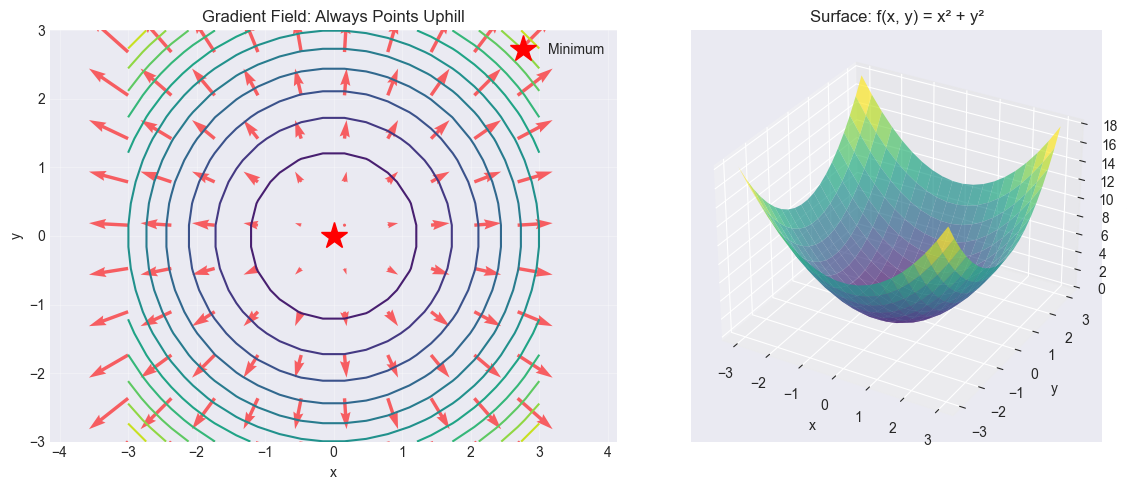


Gradients at different points:
------------------------------------------------------------
  Point (x, y)    f(x,y)    ∇f = [∂f/∂x, ∂f/∂y]
------------------------------------------------------------
  ( 2.0,  1.0)      5.00    [  4.0,   2.0]
  (-1.0,  2.0)      5.00    [ -2.0,   4.0]
  ( 0.0,  0.0)      0.00    [  0.0,   0.0]
  ( 1.5, -0.5)      2.50    [  3.0,  -1.0]

→ Gradient points away from minimum (0, 0)
→ Magnitude increases with distance from minimum
→ At minimum: gradient = [0, 0] (no direction to go)

Gradient Descent - Following the Negative Gradient

Starting from (2.5, 2.0):
Step    x        y        f(x,y)     ||∇f||
-------------------------------------------------------
   0     2.500    2.000    10.2500    6.4031
   3     1.280    1.024     2.6870    3.2784
   6     0.655    0.524     0.7044    1.6785
   9     0.336    0.268     0.1846    0.8594
  12     0.172    0.137     0.0484    0.4400
  15     0.088    0.070     0.0127    0.2253

→ Loss decreases: 10.2500 → 0.

In [7]:
"""
Gradient - Vector of Partial Derivatives

For f(x₁, x₂, ..., xₙ):

∇f = [∂f/∂x₁, ∂f/∂x₂, ..., ∂f/∂xₙ]ᵀ

Key Properties:
1. Direction of steepest ascent
2. Perpendicular to level curves
3. Zero at local min/max/saddle points

Gradient Descent:
θ_new = θ_old - α·∇f(θ_old)
"""

print("="*60)
print("Gradient - The Direction Vector")
print("="*60)

# Example: f(x, y) = x² + y²
print("\nExample: f(x, y) = x² + y²")
print("-"*60)

def f(x, y):
    """Paraboloid: bowl-shaped function"""
    return x**2 + y**2

def gradient_f(x, y):
    """
    Gradient of f:
    ∇f = [∂f/∂x, ∂f/∂y]ᵀ = [2x, 2y]ᵀ
    """
    return np.array([2*x, 2*y])

# Visualize
x_grid = np.linspace(-3, 3, 20)
y_grid = np.linspace(-3, 3, 20)
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = f(X_mesh, Y_mesh)

# Compute gradients at grid points
Gx = 2*X_mesh
Gy = 2*Y_mesh

plt.figure(figsize=(12, 5))

# Left: Contour plot with gradient vectors
plt.subplot(1, 2, 1)
plt.contour(X_mesh, Y_mesh, Z_mesh, levels=15, cmap='viridis')
plt.quiver(X_mesh[::2, ::2], Y_mesh[::2, ::2], 
           Gx[::2, ::2], Gy[::2, ::2],
           color='red', alpha=0.6)
plt.plot(0, 0, 'r*', markersize=20, label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Field: Always Points Uphill')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Right: 3D surface
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, alpha=0.7, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface: f(x, y) = x² + y²')

plt.tight_layout()
plt.show()

# Test points
test_points = [(2, 1), (-1, 2), (0, 0), (1.5, -0.5)]

print("\nGradients at different points:")
print("-"*60)
print("  Point (x, y)    f(x,y)    ∇f = [∂f/∂x, ∂f/∂y]")
print("-"*60)

for x, y in test_points:
    val = f(x, y)
    grad = gradient_f(x, y)
    print(f"  ({x:4.1f}, {y:4.1f})    {val:6.2f}    [{grad[0]:5.1f}, {grad[1]:5.1f}]")

print("\n→ Gradient points away from minimum (0, 0)")
print("→ Magnitude increases with distance from minimum")
print("→ At minimum: gradient = [0, 0] (no direction to go)")

# Gradient Descent Example
print("\n" + "="*60)
print("Gradient Descent - Following the Negative Gradient")
print("="*60)

def gradient_descent(start_point, learning_rate=0.1, n_steps=20):
    """
    Minimize f(x, y) = x² + y² using gradient descent
    
    Update rule:
    θ_new = θ_old - α·∇f(θ_old)
    
    Args:
        start_point: initial (x, y)
        learning_rate: step size α
        n_steps: number of iterations
    
    Returns:
        path: trajectory of points
    """
    path = [start_point]
    point = np.array(start_point, dtype=float)
    
    for i in range(n_steps):
        # Compute gradient at current point
        grad = gradient_f(point[0], point[1])
        
        # Move opposite to gradient (descent)
        point = point - learning_rate * grad
        
        path.append(point.copy())
    
    return np.array(path)

# Run gradient descent from different starting points
start1 = (2.5, 2.0)
path1 = gradient_descent(start1, learning_rate=0.1, n_steps=15)

print(f"\nStarting from {start1}:")
print(f"Step    x        y        f(x,y)     ||∇f||")
print("-"*55)

for i in range(0, len(path1), 3):  # Show every 3rd step
    x, y = path1[i]
    val = f(x, y)
    grad = gradient_f(x, y)
    grad_norm = np.linalg.norm(grad)
    print(f"{i:4d}    {x:6.3f}   {y:6.3f}   {val:8.4f}   {grad_norm:7.4f}")

print(f"\n→ Loss decreases: {f(*start1):.4f} → {f(*path1[-1]):.4f}")
print(f"→ Converging to minimum at (0, 0)")
print(f"\n→ Gradient descent = iteratively follow -∇f")
print(f"→ This is THE fundamental ML optimization algorithm")

## Part 2 Complete!

**Completed:**
- Sum Rule (5)
- Product Rule (6)
- Chain Rule - Backpropagation (7)
- Partial Derivatives (8)
- Gradient (9)

**Part 3 will cover:**
- Taylor Series
- Hessian Matrix
- Linear Approximation
- Advanced optimization concepts

The foundation is complete!